In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, cohen_kappa_score, precision_score, recall_score, classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [35]:
heart_data = "../data/raw/heart_disease_health_indicators_BRFSS2015.csv"
heart_df = pd.read_csv(heart_data)

In [37]:
heart_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [39]:
heart_df.shape

(253680, 22)

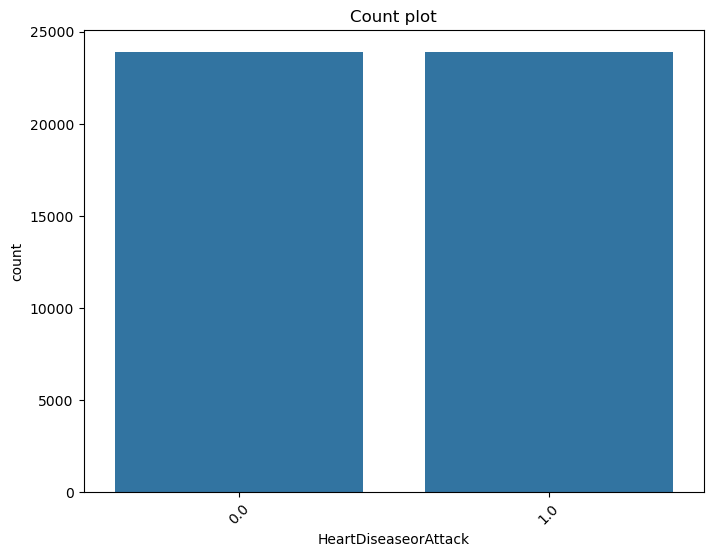

In [41]:
train = heart_df.copy()

heart_issues = train[train["HeartDiseaseorAttack"] == 1]
no_heart_issues = train[train["HeartDiseaseorAttack"] == 0]

undersampled_heart_df =  resample(no_heart_issues,
                         replace=False, 
                         n_samples = len(heart_issues),
                         random_state=0)

resampled_df = pd.concat([undersampled_heart_df, heart_issues])
#resampled_df.to_csv('../data/clean/resampled_data.csv')


plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_df, x='HeartDiseaseorAttack')
plt.title(f'Count plot')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [43]:
target = resampled_df['HeartDiseaseorAttack']
features = resampled_df.drop('HeartDiseaseorAttack', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

In [45]:
target = resampled_df['HeartDiseaseorAttack']
num_df = resampled_df.drop('HeartDiseaseorAttack', axis=1)

In [47]:
# Drop the column PhysHlth, because is correlated to the column GenHlth
# Drop the column DiffWalk, because is correlated to the column GenHlth
# Drop the column Education, because is correlated to the column Income
df_new = num_df.drop(['PhysHlth', 'DiffWalk','Education'],  axis=1)
df_new

#print("Setting up model")
x_train, x_test, y_train, y_test = train_test_split(df_new, target, test_size=0.20, random_state=0)

for i in range(3, 11):
    print(f"For n_neighbours: {i}")
    knn = KNeighborsClassifier(n_neighbors=i)
    #print("Fitting...")
    knn.fit(x_train, y_train)
    #print("Predicting...")
    y_pred = knn.predict(x_test) #This is the slowest step
    
    #print("Calculating metrics...")
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")     
    print(f"Cohen's Kappa: {kappa:.4f}")
    print(cm)  
    print()

For n_neighbours: 3
 Accuracy:  71.17%
Cohen's Kappa: 0.4234
[[3342 1450]
 [1306 3460]]

For n_neighbours: 4
 Accuracy:  69.94%
Cohen's Kappa: 0.3985
[[3759 1033]
 [1840 2926]]

For n_neighbours: 5
 Accuracy:  72.92%
Cohen's Kappa: 0.4585
[[3375 1417]
 [1171 3595]]

For n_neighbours: 6
 Accuracy:  72.21%
Cohen's Kappa: 0.4441
[[3668 1124]
 [1532 3234]]

For n_neighbours: 7
 Accuracy:  73.58%
Cohen's Kappa: 0.4717
[[3367 1425]
 [1100 3666]]

For n_neighbours: 8
 Accuracy:  72.92%
Cohen's Kappa: 0.4584
[[3579 1213]
 [1375 3391]]

For n_neighbours: 9
 Accuracy:  74.16%
Cohen's Kappa: 0.4833
[[3365 1427]
 [1043 3723]]

For n_neighbours: 10
 Accuracy:  73.74%
Cohen's Kappa: 0.4748
[[3537 1255]
 [1255 3511]]



In [57]:
#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

# Evaluate the model on the test set
for i in range(5, 21):
    print(f"For n_neighbors: {i}")
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_norm, y_train)
    y_pred = knn.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    print(f" Accuracy: {100*((cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1]))): .2f}%")        
    print(f"Cohen's Kappa: {kappa:.4f}")   
    #print(cm)
    print()

For n_neighbors: 5
 Accuracy:  52.71%
Cohen's Kappa: 0.0561

For n_neighbors: 6
 Accuracy:  57.61%
Cohen's Kappa: 0.1525

For n_neighbors: 7
 Accuracy:  55.27%
Cohen's Kappa: 0.1073

For n_neighbors: 8
 Accuracy:  59.06%
Cohen's Kappa: 0.1821

For n_neighbors: 9
 Accuracy:  56.24%
Cohen's Kappa: 0.1266

For n_neighbors: 10
 Accuracy:  60.48%
Cohen's Kappa: 0.2108

For n_neighbors: 11
 Accuracy:  58.08%
Cohen's Kappa: 0.1633

For n_neighbors: 12
 Accuracy:  63.33%
Cohen's Kappa: 0.2677

For n_neighbors: 13
 Accuracy:  60.85%
Cohen's Kappa: 0.2185

For n_neighbors: 14
 Accuracy:  65.79%
Cohen's Kappa: 0.3167

For n_neighbors: 15
 Accuracy:  63.44%
Cohen's Kappa: 0.2702

For n_neighbors: 16
 Accuracy:  67.86%
Cohen's Kappa: 0.3579

For n_neighbors: 17
 Accuracy:  65.30%
Cohen's Kappa: 0.3070

For n_neighbors: 18
 Accuracy:  69.36%
Cohen's Kappa: 0.3877

For n_neighbors: 19
 Accuracy:  67.35%
Cohen's Kappa: 0.3478

For n_neighbors: 20
 Accuracy:  69.13%
Cohen's Kappa: 0.3828



# Random forest

In [59]:
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=20)

In [64]:
forest.fit(x_train_norm, y_train)

RandomForestClassifier(max_depth=20)

In [73]:
y_pred_test_rf = forest.predict(x_test)

print(f"MAE, {mean_absolute_error(y_pred_test_rf, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_rf, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_rf, y_test): .2f}")
print(f"R2 score, {forest.score(x_test, y_test): .2f}")

MAE,  0.50
MSE,  0.50
RMSE,  0.70
R2 score,  0.50


# Gradient Boosting

In [83]:
gb_cla = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)

In [89]:
gb_cla.fit(x_train_norm, y_train)

GradientBoostingClassifier(max_depth=20)

In [92]:
y_pred_test_cla = gb_cla.predict(x_test)

print(f"MAE, {mean_absolute_error(y_pred_test_cla, y_test): .2f}")
print(f"MSE, {mean_squared_error(y_pred_test_cla, y_test): .2f}")
print(f"RMSE, {root_mean_squared_error(y_pred_test_cla, y_test): .2f}")
print(f"R2 score, {gb_cla.score(x_test, y_test): .2f}")

MAE,  0.49
MSE,  0.49
RMSE,  0.70
R2 score,  0.51
